In [1]:
%load_ext autoreload
%autoreload 2

In [114]:
import vatools
import pandas_profiling
import math
import pandas as pd
from vatools.src.db_conn import db_connection
from vatools.src.model import Tree
from vatools.src.dataset import DataSet
from pandas_profiling import ProfileReport as profile

In [156]:
data = DataSet('credit','parameters.json')

In [ ]:
profile((data.data),correlation_threshold=1)

In [157]:
data.impute(data.train_set)
data.impute(data.test_set)

,seriousdlqin2yrs,personid,revolvingutilizationofunsecuredlines,age,zipcode,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60_89dayspastduenotworse,numberofdependents,monthlyincome_imputed,numberofdependents_imputed
0,0,148956,0.003502,77,60637,0,16.000000,NaN,7,0,0,0,0.0,6499,0
1,0,140750,0.591082,39,60618,1,0.460273,4983.0,6,0,1,0,3.0,4983,3
2,0,103339,0.760519,66,60625,0,0.631963,3841.0,8,0,0,0,0.0,3841,0
3,0,107309,0.003466,86,60625,1,2192.000000,NaN,15,0,1,0,0.0,6499,0
4,0,138688,0.000000,59,60637,0,0.902864,802.0,3,0,1,0,0.0,802,0


In [16]:
data.train_set.columns

Index(['seriousdlqin2yrs', 'personid', 'revolvingutilizationofunsecuredlines',
       'age', 'zipcode', 'numberoftime30_59dayspastduenotworse', 'debtratio',
       'monthlyincome', 'numberofopencreditlinesandloans',
       'numberoftimes90dayslate', 'numberrealestateloansorlines',
       'numberoftime60_89dayspastduenotworse', 'numberofdependents',
       'monthlyincome_imputed', 'numberofdependents_imputed'],
      dtype='object')

X[0] is zipcode
X[1] is debtratio



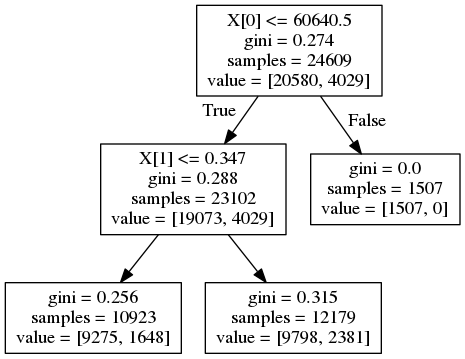

In [158]:
tree = Tree(data,[4,6],max_depth=2)
tree.visualize()

In [92]:
data.feature_key()

1 = personid
2 = revolvingutilizationofunsecuredlines
3 = age
4 = zipcode
5 = numberoftime30_59dayspastduenotworse
6 = debtratio
7 = monthlyincome
8 = numberofopencreditlinesandloans
9 = numberoftimes90dayslate
10 = numberrealestateloansorlines
11 = numberoftime60_89dayspastduenotworse
12 = numberofdependents
13 = monthlyincome_imputed
14 = numberofdependents_imputed


In [106]:
(tree.class_probabilities > .75).astype(int)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [108]:
tree.outcome_test

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
16377    1
16378    0
16379    0
16380    1
16381    0
16382    0
16383    0
16384    0
16385    0
16386    1
16387    0
16388    0
16389    0
16390    1
16391    0
16392    0
16393    0
16394    0
16395    0
16396    0
16397    0
16398    1
16399    0
16400    0
16401    0
16402    0
16403    1
16404    0
16405    0
16406    1
Name: seriousdlqin2yrs, Length: 16407, dtype: int64

In [110]:
tree.features_test

,zipcode,debtratio
0,60637,16.000000
1,60618,0.460273
2,60625,0.631963
3,60625,2192.000000
4,60637,0.902864
5,60618,0.306419
6,60629,0.492085
7,60625,35.000000
8,60625,0.000769
9,60629,0.584623


In [169]:
tree.predict(.80).ravel()

array([13816,     0,  2591,     0])

In [163]:
(tree.class_probabilities)[:,1] > .75

array([False, False, False, ..., False, False, False])

In [159]:
tree.class_probabilities.

array([[0.80449955, 0.19550045],
       [0.80449955, 0.19550045],
       [0.80449955, 0.19550045],
       ...,
       [0.80449955, 0.19550045],
       [0.8491257 , 0.1508743 ],
       [0.8491257 , 0.1508743 ]])

In [160]:
tree.predictions

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
pd.value_counts(tree.outcome_test)

0    13816
1     2591
Name: seriousdlqin2yrs, dtype: int64